<a href="https://colab.research.google.com/github/Nidhi89717/NLP/blob/main/NLP_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9dcb672c-f5cc-102c-a36e-5e9455a213b7)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-07-22 12:23:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-22 12:23:23 (118 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset
The dataset has been [downloaded from Kaggle](https://www.kaggle.com/c/nlp-getting-started/data)

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-07-22 12:23:33--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.29MB/s    in 0.4s    

2023-07-22 12:23:33 (1.29 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text data

In [4]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [5]:
# Shuffle the dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.value_counts('target')

target
0    4342
1    3271
dtype: int64

In [ ]:
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
California oil spill might be larger than projected: http://t.co/xwxBYHTuzC http://t.co/wzeDxEFBlg

---

Target: 0 (not real disaster)
Text:
Cartoon Bears. Without them we would qave no knowlddge of forest fires or toilet paper.

---

Target: 1 (real disaster)
Text:
@_gaabyx we got purple activist I thought it was a drought

---

Target: 0 (not real disaster)
Text:
@BuffoonMike I knew mo not doing much would bite us he was influenced by that shitty staff and injuries are not acquisitions

---

Target: 0 (not real disaster)
Text:
@toddstarnes Enjoy the impending landslide Todd. Hehe.

---



### Split the data into training and validation sets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                           train_df_shuffled['target'].to_numpy(),
                                                                           test_size=0.1, random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers
There are a few ways to do this, namely:
* Tokenziation - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)
The `TextVectorization` layer takes the following parameters:
* `max_tokens` - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* `standardize` - Method for standardizing text. Default is `"lower_and_strip_punctuation"` which lowers text and removes all punctuation marks.
* `split` - How to split text, default is `"whitespace"` which splits on spaces.
* `ngrams` - How many words to contain per token split, for example, `ngrams=2` splits tokens into continuous sequences of 2.
* `output_mode` -  How to output tokens, can be `"int"` (integer mapping), `"binary"` (one-hot encoding), `"count"` or `"tf-idf"`. See documentation for more.
* `output_sequence_length` - Length of tokenized sequence to output. For example, if `output_sequence_length=150`, all tokenized sequences will be 150 tokens long.
* `pad_to_max_tokens` - Defaults to `False`, if `True`, the output feature axis will be padded to `max_tokens` even if the number of unique tokens in the vocabulary is less than `max_tokens`. Only valid in certain modes, see docs for more.


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Using the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    #pad_to_max_tokens=True
                                    )

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find average number of tokens (words) in training Tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [9]:
# Set up text vectorization variable
max_vocab_length = 10000  # max number of words to have in our vocabulary
max_length = 15  # max length of our sequences (e.g how many words from a tweet our model can see)

textvectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_mode='int',
                                   output_sequence_length=max_length)

In [10]:
# Fit the text vectorizer to the training set
textvectorizer.adapt(train_sentences)

In [53]:
# create a sample and tokenize it
sample_sentence = "There's a flood in my street!"
textvectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokrnize it
random_sen = random.choice(train_sentences)
print(f"Original text\n{random_sen}\
\n\nVectorized version")
textvectorizer([random_sen])

Original text
#EMERGENCY in Odai Bucharest Romania 600 Dogs Dying!They are so Hungry that they EAT EACH OTHER! http://t.co/pjigXPVPl0

Vectorized version


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  73,    4,    1,    1, 9000, 1232, 1303,    1,   22,   28, 2430,
          16,   64, 2131, 1299]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = textvectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Five most common words: {top_5_words}")
print(f"Five least common words: {bottom_5_words}")

Number of words in vocab: 10000
Five most common words: ['', '[UNK]', 'the', 'a', 'in']
Five least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer
The main parameters are:
* `input_dim` - The size of the vocabulary (e.g. `len(text_vectorizer.get_vocabulary()`).
* `output_dim` - The size of the output embedding vector, for example, a value of `100` outputs a  feature vector of size 100 for each word.
* `embeddings_initializer` - How to initialize the embeddings matrix, default is `"uniform"` which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` - Length of sequences being passed to embedding layer.

In [11]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

embedding

In [ ]:
# Get the random sentence from training data
random_sen = random.choice(train_sentences)
print(f"Original text:\n{random_sen}\
      \n\nEmbedded text:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(textvectorizer([random_sen]))
sample_embed

Original text:
Investigators rule catastrophic structural failure resulted in 2014 ... http://t.co/QU1IUg3E9r      

Embedded text:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03615249,  0.03832344, -0.02095512, ..., -0.03466698,
         -0.03490912, -0.0312163 ],
        [ 0.01840024,  0.03774644,  0.01065712, ...,  0.02744633,
         -0.03196799, -0.00606104],
        [-0.03611862,  0.02368722, -0.01945784, ...,  0.01038448,
         -0.02234794, -0.03687359],
        ...,
        [-0.01286062,  0.04066697,  0.03539035, ...,  0.04011906,
          0.03627365,  0.00685431],
        [-0.01286062,  0.04066697,  0.03539035, ...,  0.04011906,
          0.03627365,  0.00685431],
        [-0.01286062,  0.04066697,  0.03539035, ...,  0.04011906,
          0.03627365,  0.00685431]]], dtype=float32)>

## Modelling a text dataset (running a series of experiments)

We've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

* **Model 0**: Naive Bayes (baseline)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Same as model 6 with 10% of training data

Each experiment will go through the following steps:
* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison


### Model 0: Getting a baseline


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [13]:
# Create a tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # Convert the numbers into words using tfidf
    ('clf', MultinomialNB())   # model the text
])

# Fit the pipeline
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [14]:
# Evaluate the model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Baseline model achieves an accuracy of {baseline_score*100:.2f}%')

Baseline model achieves an accuracy of 79.27%


In [15]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

In [16]:
# Function to evaluate: accuracy, precision, accuracy, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)*100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [17]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                    y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model


In [18]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [19]:
# Build the model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1D string
x = textvectorizer(inputs) # Turn the input text into numbers
x = embedding(x) # Create the embedding of the numberized input
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [20]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [21]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20230722-122949
Epoch 1/5
215/215 [==============================] - 20s 64ms/step - loss: 0.6138 - accuracy: 0.6819 - val_loss: 0.5377 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4433 - accuracy: 0.8181 - val_loss: 0.4728 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3485 - accuracy: 0.8586 - val_loss: 0.4577 - val_accuracy: 0.7966
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2853 - accuracy: 0.8876 - val_loss: 0.4636 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2392 - accuracy: 0.9092 - val_loss: 0.4799 - val_accuracy: 0.7874


In [22]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4799 - accuracy: 0.7874


[0.4799410104751587, 0.787401556968689]

In [23]:
model_1_pred_prob = model_1.predict(val_sentences)
model_1_pred_prob.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
model_1_pred_prob[0], model_1_pred_prob[1]

(array([0.45632386], dtype=float32), array([0.77371496], dtype=float32))

In [24]:
# Convert the model prediction probabilities into labels
model_1_preds = tf.squeeze(tf.round(model_1_pred_prob))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [25]:
# Calculate model_1 results
model_1_results = calculate_results(y_pred=model_1_preds,
                                    y_true=val_labels)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.791897156051696,
 'recall': 0.7874015748031497,
 'f1': 0.7845557264291478}

In [27]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
words_in_vocab = textvectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape  # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)

Now we've got these two objects, we can use the [Embedding Projector tool](http://projector.tensorflow.org/_) to visualize our embedding.

To use the Embedding Projector tool, we need two files:
* The embedding vectors (same as embedding weights).
* The meta data of the embedding vectors (the words they represent - our vocabulary).

Right now, we've got of these files as Python objects. To download them to file, we're going to [use the code example available on the TensorFlow word embeddings tutorial page](https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk).


In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
      continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

In [ ]:
# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Once you've downloaded the embedding vectors and metadata, you can visualize them using Embedding Vector tool:
1. Go to  http://projector.tensorflow.org/
2. Click on "Load data"
3. Upload the two files you downloaded (`embedding_vectors.tsv` and `embedding_metadata.tsv`)
4. Explore
5. Optional: You can share the data you've created by clicking "Publish"

What do you find?

Are words with similar meanings close together?

Remember, they might not be. The embeddings we downloaded are how our model interprets words, not necessarily how we interpret them.

Also, since the embedding has been learned purely from Tweets, it may contain some strange values as Tweets are a very unique style of natural language.

## Recurrent Neural Network (RNN's)
The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (`X`) and compute an output (`y`) based on all previous inputs.


### Model 2: LSTM

LSTM = Long Short Term Memory

Structure of RNN:
```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

In [28]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = textvectorizer(inputs)
x = embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (we can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_1_LSTM')

In [ ]:
# Get a summary
model_2.summary()

Model: "model_1_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [29]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])

In [30]:
# Fit the model
model_2_history = model_2.fit(train_sentences, train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230722-123141
Epoch 1/5
215/215 [==============================] - 15s 54ms/step - loss: 0.2195 - accuracy: 0.9209 - val_loss: 0.4999 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1596 - accuracy: 0.9435 - val_loss: 0.6351 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1278 - accuracy: 0.9517 - val_loss: 0.6442 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1073 - accuracy: 0.9600 - val_loss: 0.8495 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0836 - accuracy: 0.9654 - val_loss: 0.9498 - val_accuracy: 0.7743


In [31]:
# Make predictions with LSTM model
model_2_pred_prob = model_2.predict(val_sentences)
model_2_pred_prob[:10]

24/24 [==============================] - 0s 3ms/step


array([[9.6959285e-03],
       [8.6075699e-01],
       [9.9983692e-01],
       [9.6121617e-03],
       [2.5782347e-04],
       [9.9796486e-01],
       [9.0845609e-01],
       [9.9987233e-01],
       [9.9981159e-01],
       [2.4526441e-01]], dtype=float32)

In [32]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_prob))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [33]:
model_2_results = calculate_results(y_pred=model_2_preds,
                                    y_true=val_labels)
model_2_results

{'accuracy': 77.42782152230971,
 'precision': 0.7762579677540307,
 'recall': 0.7742782152230971,
 'f1': 0.7721023076072874}

### Model 3: GRU
Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [34]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype='string')
x = textvectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs,name='model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [35]:
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [36]:
# Fit the model
model_3_history = model_3.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230722-123235
Epoch 1/5
215/215 [==============================] - 15s 57ms/step - loss: 0.1548 - accuracy: 0.9396 - val_loss: 0.7806 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0810 - accuracy: 0.9689 - val_loss: 0.8255 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0665 - accuracy: 0.9742 - val_loss: 1.1791 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0579 - accuracy: 0.9758 - val_loss: 1.1018 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0505 - accuracy: 0.9774 - val_loss: 1.3113 - val_accuracy: 0.7743


In [37]:
# Make predictions with GRU model
model_3_pred_prob = model_3.predict(val_sentences)
model_3_pred_prob[:10]

24/24 [==============================] - 0s 3ms/step


array([[3.0205367e-04],
       [8.5182023e-01],
       [9.9987638e-01],
       [3.9784376e-02],
       [3.6381436e-05],
       [9.9967670e-01],
       [8.4620512e-01],
       [9.9995482e-01],
       [9.9994087e-01],
       [7.3638475e-01]], dtype=float32)

In [38]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_prob))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [39]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7762579677540307,
 'recall': 0.7742782152230971,
 'f1': 0.7721023076072874}

### Model 4: Bidirectional RNN
A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

In [40]:
# Build a bidirectional RNN in tensorflow
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
x = textvectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [41]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [42]:
# Fit the model
model_4_history = model_4.fit(train_sentences, train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230722-123325
Epoch 1/5
215/215 [==============================] - 17s 59ms/step - loss: 0.1056 - accuracy: 0.9682 - val_loss: 0.9659 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0503 - accuracy: 0.9791 - val_loss: 1.1237 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0454 - accuracy: 0.9799 - val_loss: 1.1876 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0415 - accuracy: 0.9794 - val_loss: 1.3706 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0400 - accuracy: 0.9812 - val_loss: 1.4783 - val_accuracy: 0.7651


In [43]:
# Make predictions with bidirectional model
model_4_pred_prob = model_4.predict(val_sentences)
model_4_pred_prob[:10]

24/24 [==============================] - 1s 4ms/step


array([[4.0725022e-04],
       [9.7784233e-01],
       [9.9998915e-01],
       [1.9151159e-01],
       [2.9725932e-05],
       [9.9941063e-01],
       [9.8772961e-01],
       [9.9999428e-01],
       [9.9999011e-01],
       [9.9371207e-01]], dtype=float32)

In [44]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_prob))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [45]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.7658125387191,
 'recall': 0.7650918635170604,
 'f1': 0.7634031052086162}

## Convolutional Neural Networks for Text
The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following:

```
Inputs (text) -> Tokenization -> Embedding -> Layers (typically Conv1D + pooling) -> Outputs (class probabilities)
```

### Model 5: Conv1D

In [46]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(textvectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # This is also referred as an ngram of 5 (meaning it looks at 5 words at a time)
                        strides=1, # default
                        activation="relu",
                        padding='same') # defalut = 'valid', the output is smaller than the input shape, 'same' means output is same shape as input
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [68]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = textvectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
#x = layers.Dense(64, activation='relu')
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_Conv1D')

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Get the model summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 1)              

In [69]:
# Fit the model
model_5_history = model_5.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'model_5_Conv1D')])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20230722-123816
Epoch 1/5
215/215 [==============================] - 12s 51ms/step - loss: 0.0927 - accuracy: 0.9755 - val_loss: 1.0192 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0533 - accuracy: 0.9791 - val_loss: 1.1492 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0485 - accuracy: 0.9801 - val_loss: 1.1952 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0459 - accuracy: 0.9807 - val_loss: 1.2402 - val_accuracy: 0.7493
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0464 - accuracy: 0.9803 - val_loss: 1.2168 - val_accuracy: 0.7546


In [70]:
# Make prediction with Conv1D model
model_5_pred_prob = model_5.predict(val_sentences)
model_5_pred_prob[:10]

24/24 [==============================] - 0s 3ms/step


array([[2.6311043e-01],
       [8.1541896e-01],
       [9.9977130e-01],
       [5.4165274e-02],
       [1.6473005e-07],
       [9.8896480e-01],
       [9.8906052e-01],
       [9.9997663e-01],
       [9.9999964e-01],
       [8.4228945e-01]], dtype=float32)

In [71]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_prob))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [72]:
model_5_results = calculate_results(y_pred=model_5_preds,
                                    y_true=val_labels)
model_5_results

{'accuracy': 75.45931758530183,
 'precision': 0.7545478978669297,
 'recall': 0.7545931758530183,
 'f1': 0.7533013461853509}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder
Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4


In [ ]:
sample_sentence

"There's a flood in my street!"

In [54]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [55]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encode_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                       input_shape=[],
                                       dtype=tf.string,
                                       trainable=False,
                                       name='USE')

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encode_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [57]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230722-123637
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5052 - accuracy: 0.7847 - val_loss: 0.4502 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4158 - accuracy: 0.8146 - val_loss: 0.4417 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.4016 - accuracy: 0.8216 - val_loss: 0.4387 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3939 - accuracy: 0.8227 - val_loss: 0.4316 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3869 - accuracy: 0.8300 - val_loss: 0.4303 - val_accuracy: 0.8110


In [58]:
# Make Predictions with USE TF Hub model
model_6_pred_prob = model_6.predict(val_sentences)
model_6_pred_prob[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.16564728],
       [0.756769  ],
       [0.9855423 ],
       [0.21174884],
       [0.7049222 ],
       [0.7072254 ],
       [0.9756428 ],
       [0.9730049 ],
       [0.9206608 ],
       [0.09523535]], dtype=float32)

In [59]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_prob))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [60]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.10236220472441,
 'precision': 0.8140341548215564,
 'recall': 0.8110236220472441,
 'f1': 0.809201931950287}

### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data
One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

To put this to the test, we're going to make a small subset of the training data (10%), train a model and evaluate it.


In [61]:
# Create subsets of 10% of the training data
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [62]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [63]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent, train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'tf_hub_sentence_encoder_10_percent')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20230722-123733
Epoch 1/5
22/22 [==============================] - 4s 47ms/step - loss: 0.6673 - accuracy: 0.6924 - val_loss: 0.6505 - val_accuracy: 0.6942
Epoch 2/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5969 - accuracy: 0.7974 - val_loss: 0.5973 - val_accuracy: 0.7375
Epoch 3/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5220 - accuracy: 0.8192 - val_loss: 0.5458 - val_accuracy: 0.7572
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4595 - accuracy: 0.8294 - val_loss: 0.5088 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4152 - accuracy: 0.8411 - val_loss: 0.4987 - val_accuracy: 0.7703


In [64]:
# Make predictions
model_7_pred_prob = model_7.predict(val_sentences)
model_7_pred_prob[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.25684142],
       [0.77072865],
       [0.88685566],
       [0.3383615 ],
       [0.5244769 ],
       [0.8246711 ],
       [0.7965331 ],
       [0.83242166],
       [0.8092471 ],
       [0.12289056]], dtype=float32)

In [65]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_prob))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
model_7_results = calculate_results(y_true=val_labels,
                                  y_pred=model_7_preds)
model_7_results

{'accuracy': 77.03412073490814,
 'precision': 0.777474429665145,
 'recall': 0.7703412073490814,
 'f1': 0.7660102480449128}

## Comparing the performance of each of our models

In [73]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791897,0.787402,0.784556
lstm,77.427822,0.776258,0.774278,0.772102
gru,77.427822,0.776258,0.774278,0.772102
bidirectional,76.509186,0.765813,0.765092,0.763403
conv1d,75.459318,0.754548,0.754593,0.753301
tf_hub_sentence_encoder,81.102362,0.814034,0.811024,0.809202
tf_hub_10_percent_data,77.034121,0.777474,0.770341,0.766010


In [74]:
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791897,0.787402,0.784556
lstm,0.774278,0.776258,0.774278,0.772102
gru,0.774278,0.776258,0.774278,0.772102
bidirectional,0.765092,0.765813,0.765092,0.763403
conv1d,0.754593,0.754548,0.754593,0.753301
tf_hub_sentence_encoder,0.811024,0.814034,0.811024,0.809202
tf_hub_10_percent_data,0.770341,0.777474,0.770341,0.766010


In [77]:
import matplotlib.pyplot as plt

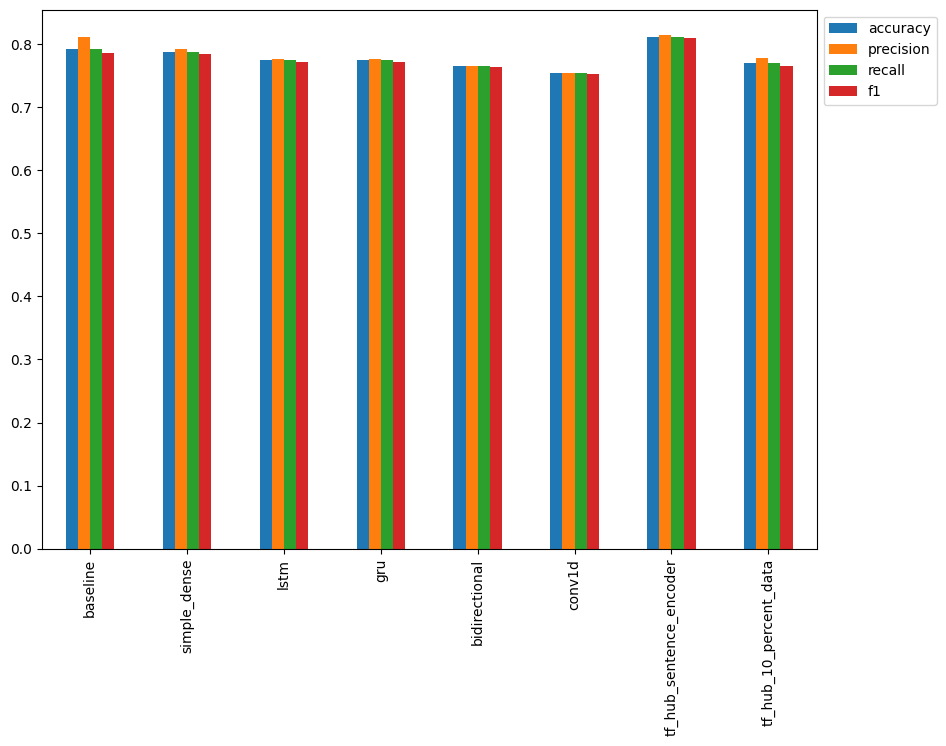

In [78]:
# Plot and compare all of the model results
all_model_results.plot(kind='bar', figsize=(10,7))
plt.legend(bbox_to_anchor=(1,1))

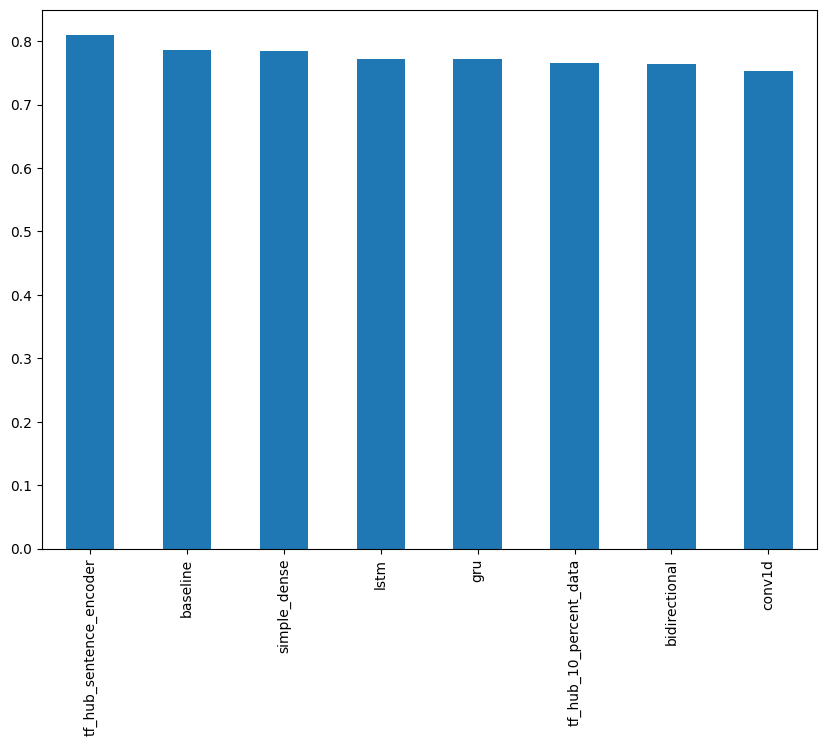

In [82]:
# Sort model results by f1 score
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar',figsize=(10,7));

## Saving and Loading a trained model

In [86]:
# Save TF hub Sentence Encoder model to HDF5 format
model_6.save('model_6.h5')

In [88]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [89]:
# How does our loaded model performes?
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4303 - accuracy: 0.8110


[0.43028873205184937, 0.8110235929489136]

Save to the `SavedModel` format (default)

In [90]:
model_6.save('model_6_SavedModel_format')

In [95]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel_format = tf.keras.models.load_model('model_6_SavedModel_format')

In [97]:
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 21ms/step - loss: 0.4303 - accuracy: 0.8110


[0.43028873205184937, 0.8110235929489136]

## Finding the most wrong examples
One of the best ways to inspect your data is to sort your model's predictions and find the samples it got *most* wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.
* If our best model still isn't perfect, what examples is it getting wrong?
* Which ones are the *most* wrong?
* Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this

In [99]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({'text':val_sentences,
                       'target': val_labels,
                       'pred':model_6_preds,
                       'pred_prob':tf.squeeze(model_6_pred_prob)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.165647
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.756769
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.985542
3,@camilacabello97 Internally and externally scr...,1,0.0,0.211749
4,Radiation emergency #preparedness starts with ...,1,1.0,0.704922


In [102]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob',ascending=False)
most_wrong.head(10) # False Positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.918388
759,FedEx will no longer transport bioterror patho...,0,1.0,0.879754
628,@noah_anyname That's where the concentration c...,0,1.0,0.860406
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.836534
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.832725
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.826389
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.793871
144,The Sound of Arson,0,1.0,0.791792
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.784545
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.757368


A reminder:
* `0` = Not a real diaster Tweet
* `1` = Real diaster Tweet

In [103]:
most_wrong.tail(10) # False Negatives

,text,target,pred,pred_prob
486,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...,1,0.0,0.066845
221,going to redo my nails and watch behind the sc...,1,0.0,0.057175
59,You can never escape me. Bullets don't harm me...,1,0.0,0.052683
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.047993
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.047125
233,I get to smoke my shit in peace,1,0.0,0.047051
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.040671
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038141
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.035973
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.031526


In [104]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9183879494667053
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8797542452812195
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.860405683517456
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.836534321308136
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.832724928855896
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1, Prob: 0.8263892531394958
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob

In [105]:
# Check the false negatives (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06684543192386627
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.0571746826171875
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.052682921290397644
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04799335449934006
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.04712453484535217
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.04705076664686203
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.04067081958

## Making predictions on the test dataset


In [107]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 129ms/step
Pred: 1, Prob: 0.9669144153594971
Text:
#Nepal Magnitude 4.3 tremor rattles #Dolakha as #aftershock counts 367 | Recent Natural Disasters : http://t.co/Re1d5ffcSx

----

1/1 [==============================] - 0s 86ms/step
Pred: 0, Prob: 0.08087573945522308
Text:
@atlwtmgc damn this blew up

----

1/1 [==============================] - 0s 86ms/step
Pred: 1, Prob: 0.6211913824081421
Text:
Contractor hired to demolish Goodrich plant in Miami files for bankruptcy - Tulsa World: Manufacturing http://t.co/uk7YwsvMgA

----

1/1 [==============================] - 0s 110ms/step
Pred: 1, Prob: 0.802894651889801
Text:
@dinnerwithjulie because its been obliterated?

----

1/1 [==============================] - 0s 69ms/step
Pred: 0, Prob: 0.28051528334617615
Text:
S3XLEAK!!!
Ph0tos of 19yrs old Ash@wo lady in Festac town from Delta exp0sed on BBM 5 leaked pictures... http://t.co/2WUpSDttVi

----

1/1 [==============================] - 0s 67ms/ste

## The speed/score tradeoff


In [108]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [109]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 17ms/step


(0.7273021560004054, 0.0009544647716540753)

In [110]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.05745375500009686, 7.5398628609051e-05)

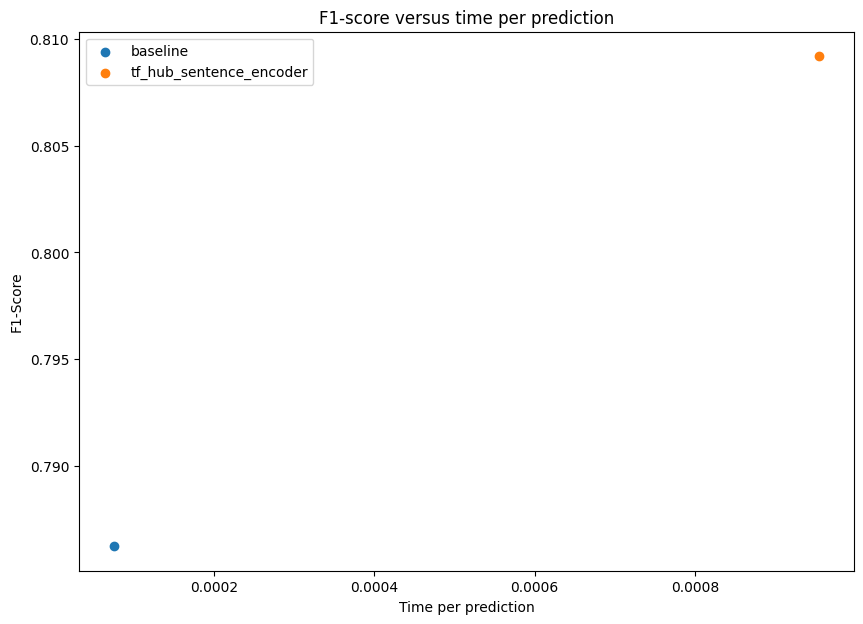

In [111]:
plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");